In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import tensorflow as tf

In [3]:
a = tf.constant([1.0, 2.0])
b = tf.constant([3.0, 4.0])
c = a + b
print("Computed on device:", c.device)  # Should be CPU


Computed on device: /job:localhost/replica:0/task:0/device:CPU:0


In [4]:
import numpy as np
import tensorflow as tf
import pandas as pd
import os
import matplotlib as pt

**Data Load & Preprocessing**

In [5]:
dataset_path=os.listdir('C:/Users/param/Downloads/archive/pest/train')
print(dataset_path)

print("Type of classes labels found ",len(dataset_path))

['aphids', 'armyworm', 'beetle', 'bollworm', 'grasshopper', 'mites', 'mosquito', 'sawfly', 'stem_borer']
Type of classes labels found  9


In [6]:
class_labels=[]

for item in dataset_path:
    all_classes=os.listdir('C:/Users/param/Downloads/archive/pest/train'+'/'+item)

    for room in all_classes:
        class_labels.append((item,str('dataset_path'+'/'+item)+'/'+room))


    df=pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
    print(df.head(10))
    df.tail(10)

   Labels                                     image
0  aphids  dataset_path/aphids/jpg_0 - Copy (2).jpg
1  aphids  dataset_path/aphids/jpg_0 - Copy (3).jpg
2  aphids  dataset_path/aphids/jpg_0 - Copy (4).jpg
3  aphids      dataset_path/aphids/jpg_0 - Copy.jpg
4  aphids             dataset_path/aphids/jpg_0.jpg
5  aphids  dataset_path/aphids/jpg_1 - Copy (2).jpg
6  aphids  dataset_path/aphids/jpg_1 - Copy (3).jpg
7  aphids  dataset_path/aphids/jpg_1 - Copy (4).jpg
8  aphids      dataset_path/aphids/jpg_1 - Copy.jpg
9  aphids             dataset_path/aphids/jpg_1.jpg
   Labels                                     image
0  aphids  dataset_path/aphids/jpg_0 - Copy (2).jpg
1  aphids  dataset_path/aphids/jpg_0 - Copy (3).jpg
2  aphids  dataset_path/aphids/jpg_0 - Copy (4).jpg
3  aphids      dataset_path/aphids/jpg_0 - Copy.jpg
4  aphids             dataset_path/aphids/jpg_0.jpg
5  aphids  dataset_path/aphids/jpg_1 - Copy (2).jpg
6  aphids  dataset_path/aphids/jpg_1 - Copy (3).jpg
7  aphids  d

In [7]:
print("Total numbers of images in the dataset: ",len(df))

label_count=df['Labels'].value_counts()
print(label_count)

Total numbers of images in the dataset:  2700
aphids         300
armyworm       300
beetle         300
bollworm       300
grasshopper    300
mites          300
mosquito       300
sawfly         300
stem_borer     300
Name: Labels, dtype: int64


In [16]:
import cv2
path='C:/Users/param/Downloads/archive/pest/train/'
dataset_path=os.listdir('C:/Users/param/Downloads/archive/pest/train')

im_size=224

images=[]
labels=[]

for i in dataset_path:
    data_path=path+str(i)
    filenames=[i for i in os.listdir(data_path)]

    for f in filenames:
      img=cv2.imread(data_path+'/'+f)
      img=cv2.resize(img,(im_size,im_size))
      images.append(img)
      labels.append(i)


In [17]:
import numpy as np

# Convert to float32 and normalize in one step
images = np.asarray(images, dtype=np.float32) / 255.0
print(images.shape)

(2700, 224, 224, 3)


One hot Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder=LabelEncoder()
y=y_labelencoder.fit_transform(y)
print(y)

['aphids' 'aphids' 'aphids' ... 'stem_borer' 'stem_borer' 'stem_borer']
[0 0 0 ... 8 8 8]


In [19]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y=ct.fit_transform(y).toarray()
print(Y[:5])
print(Y[15:])

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [20]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

images, Y=shuffle(images,Y,random_state=1)

tarin_x, test_x, train_y, test_y=train_test_split(images, Y, test_size=0.2, random_state=415)


print(tarin_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2160, 224, 224, 3)
(2160, 9)
(540, 224, 224, 3)
(540, 9)


**EfficientNet Implementation **

In [21]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES=9
IMG_SIZE=224
size=(IMG_SIZE, IMG_SIZE)
inputs=layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
# Using model without transfer learning
outputs=EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [22]:
model = tf.keras.Model(inputs,outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 9)                4061100   
                                                                 
Total params: 4,061,100
Trainable params: 4,019,077
Non-trainable params: 42,023
_________________________________________________________________


In [23]:
hist = model.fit(tarin_vvx, train_y, epochs=30, verbose=2)

Epoch 1/30
68/68 - 525s - loss: 3.4710 - accuracy: 0.1597 - 525s/epoch - 8s/step
Epoch 2/30
68/68 - 345s - loss: 2.4548 - accuracy: 0.2620 - 345s/epoch - 5s/step
Epoch 3/30
68/68 - 408s - loss: 1.8995 - accuracy: 0.4602 - 408s/epoch - 6s/step
Epoch 4/30
68/68 - 352s - loss: 1.2986 - accuracy: 0.6745 - 352s/epoch - 5s/step
Epoch 5/30
68/68 - 351s - loss: 0.8181 - accuracy: 0.7870 - 351s/epoch - 5s/step
Epoch 6/30
68/68 - 345s - loss: 0.5811 - accuracy: 0.8736 - 345s/epoch - 5s/step
Epoch 7/30
68/68 - 346s - loss: 0.4793 - accuracy: 0.8833 - 346s/epoch - 5s/step
Epoch 8/30
68/68 - 478s - loss: 0.4156 - accuracy: 0.9019 - 478s/epoch - 7s/step
Epoch 9/30
68/68 - 484s - loss: 0.3919 - accuracy: 0.9014 - 484s/epoch - 7s/step
Epoch 10/30
68/68 - 476s - loss: 0.2484 - accuracy: 0.9292 - 476s/epoch - 7s/step
Epoch 11/30
68/68 - 481s - loss: 0.2300 - accuracy: 0.9380 - 481s/epoch - 7s/step
Epoch 12/30
68/68 - 479s - loss: 0.1671 - accuracy: 0.9542 - 479s/epoch - 7s/step
Epoch 13/30
68/68 - 479s 

In [32]:
import matplotlib.pyplot as plt

def plot_hist(hist):
  plt.plot(hist.history['accuracy'])
  #plt.plot(hist.history['val_accuracy'])
  plt.plot(hist.history['loss'])
  plt.title("model accuracy")
  plt.title("model accuracy")
  plt.ylabel("accuracy")
  plt.xlabel("epoch")
  plt.legend(["train", "validation"], loc="upper left")
  plt.show()

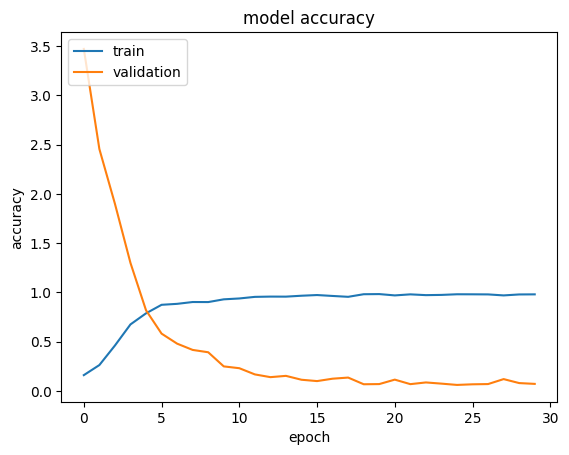

In [33]:
plot_hist(hist)

In [24]:
preds=model.evaluate(test_x, test_y)
print("Loss: "+str(preds[0]))
print("Test Accuracy: "+str(preds[0]))


17/17 [==============================] - 19s 979ms/step - loss: 0.1658 - accuracy: 0.9426
Loss: 0.16576482355594635
Test Accuracy: 0.16576482355594635


In [25]:

y_pred_probs = model.predict(test_x)           # Shape: (num_samples, num_classes)
y_pred = np.argmax(y_pred_probs, axis=1)       # Convert probabilities to class indices


17/17 [==============================] - 21s 1s/step


In [27]:
y_true = np.argmax(test_y, axis=1)


Confusion Matrix:
 [[65  0  0  0  0  0  0  0  0]
 [ 0 67  0  0  3  0  0  0  0]
 [ 0  0 66  0  2  0  0  0  2]
 [ 6  1  0 38  2  0  0  0  2]
 [ 0  0  0  0 54  0  0  0  0]
 [ 2  0  0  0  1 63  0  0  0]
 [ 0  1  0  0  2  0 41  0  1]
 [ 4  1  0  0  0  1  0 53  0]
 [ 0  0  0  0  0  0  0  0 62]]


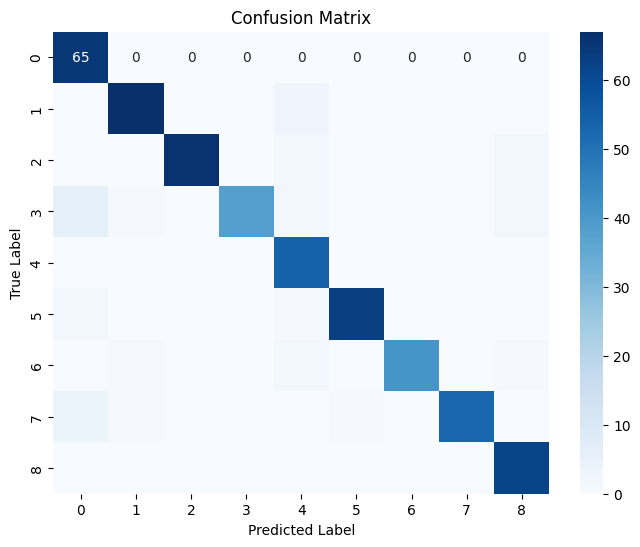


Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.92        65
           1       0.96      0.96      0.96        70
           2       1.00      0.94      0.97        70
           3       1.00      0.78      0.87        49
           4       0.84      1.00      0.92        54
           5       0.98      0.95      0.97        66
           6       1.00      0.91      0.95        45
           7       1.00      0.90      0.95        59
           8       0.93      1.00      0.96        62

    accuracy                           0.94       540
   macro avg       0.95      0.94      0.94       540
weighted avg       0.95      0.94      0.94       540



In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Optional: visualize it
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Optional: classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred))

Input image shape: (1, 224, 224, 3)


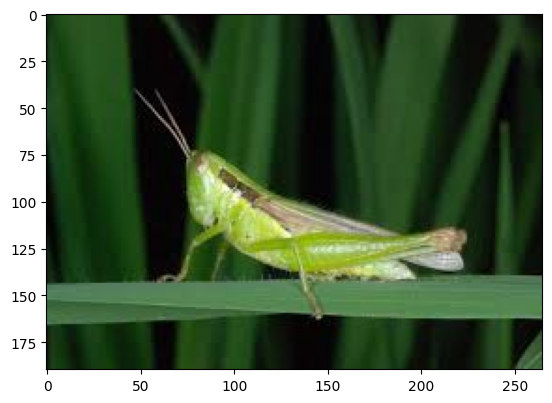

In [60]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = "C:/Users/param/Downloads/archive/pest/train/grasshopper/jpg_7 - Copy (2).jpg"

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [61]:
import numpy as np

class_names = ['aphids', 'armyworm', 'beetle', 'bollworm', 'grasshopper', 'mites', 'mosquito', 'sawfly', 'stem_borer']

# Get predictions
preds = model.predict(x)  # x should be a preprocessed image or batch
preds = preds.astype('float64')  # Optional: convert if needed

# For single image
predicted_index = np.argmax(preds)
predicted_label = class_names[predicted_index]

print("Predicted class index:", predicted_index)
print("Predicted label:", predicted_label)


1/1 [==============================] - 0s 76ms/step
Predicted class index: 2
Predicted label: beetle


17/17 [==============================] - 19s 1s/step


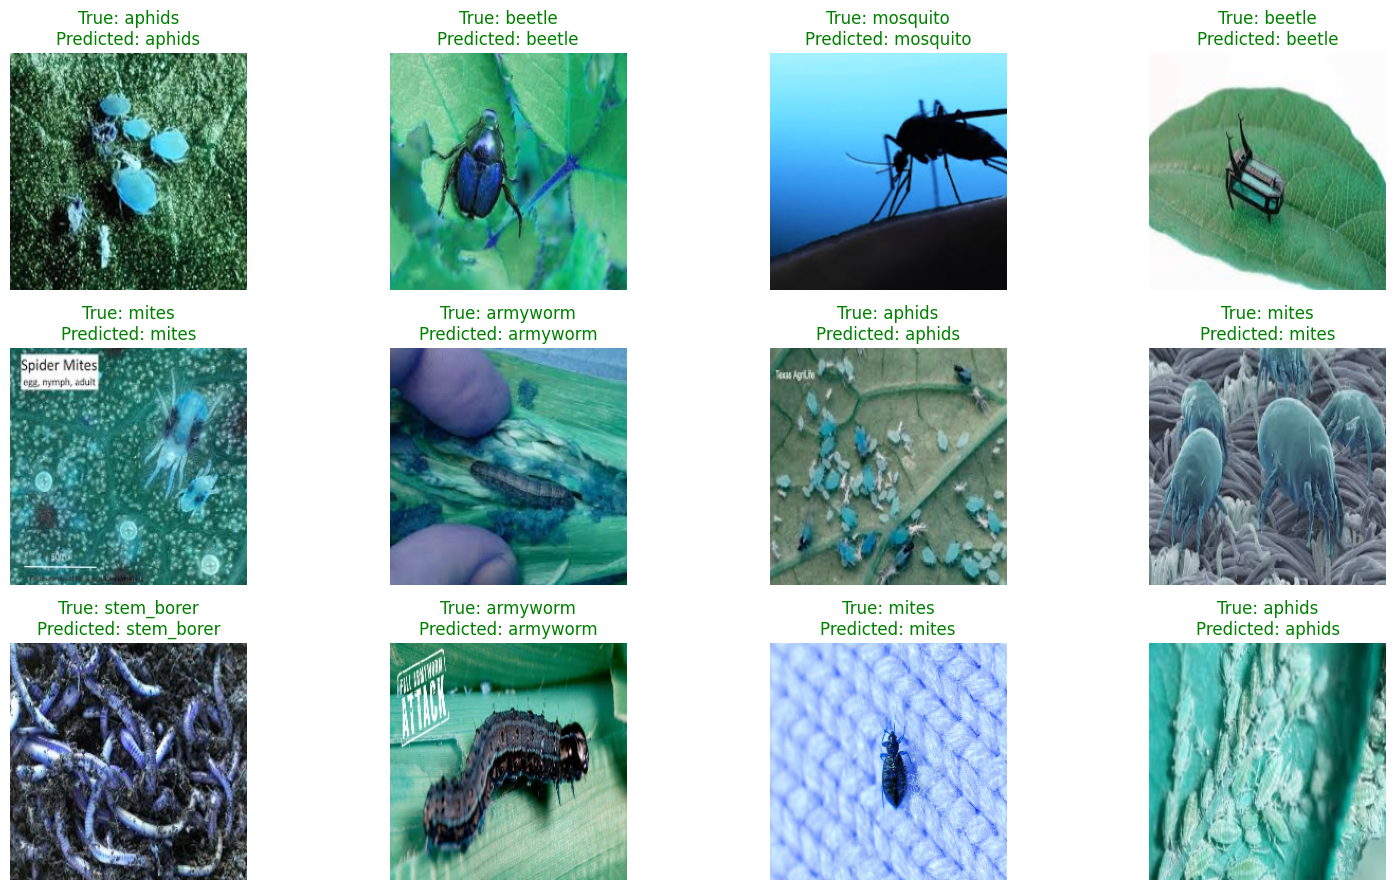

In [42]:
import random
# Decode labels (if one-hot encoded)
class_names=['aphids', 'armyworm', 'beetle', 'bollworm', 'grasshopper', 'mites', 'mosquito', 'sawfly', 'stem_borer']
true_labels = np.argmax(test_y, axis=1)

# Get model predictions
pred_probs = model.predict(test_x)
pred_labels = np.argmax(pred_probs, axis=1)

# Pick random indices
random_indices = random.sample(range(len(test_x)), 12)

# Plotting
plt.figure(figsize=(16, 9))
for i, idx in enumerate(random_indices):
    img = test_x[idx]
    true_label = class_names[true_labels[idx]]
    pred_label = class_names[pred_labels[idx]]
    correct = (true_label == pred_label)

    plt.subplot(3, 4, i+1)
    plt.imshow(img)
    color = 'green' if correct else 'red'
    plt.title(f"True: {true_label}\nPredicted: {pred_label}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [66]:
import tensorflow as tf
import numpy as np
import os

# Path to the fresh test folder (update this to your actual path)
test_data_dir = "C:/Users/param/Downloads/archive/pest/test"  # e.g., "Downloads/archive/pest/test"

# Image parameters
img_height = 224
img_width = 224
batch_size = 32

# Load test dataset from directory
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False  # Don't shuffle for evaluation
)

# Normalize pixel values to [0, 1]
normalization_layer = tf.keras.layers.Rescaling(1./255)
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Convert to numpy arrays
test_x2 = []
test_y2 = []

for images, labels in test_ds:
    test_x2.append(images.numpy())
    test_y2.append(labels.numpy())

test_x2 = np.concatenate(test_x2, axis=0)
test_y2 = np.concatenate(test_y2, axis=0)

print("test_x2 shape:", test_x2.shape)
print("test_y2 shape:", test_y2.shape)


Found 450 files belonging to 9 classes.
test_x2 shape: (450, 224, 224, 3)
test_y2 shape: (450,)


15/15 [==============================] - 27s 2s/step


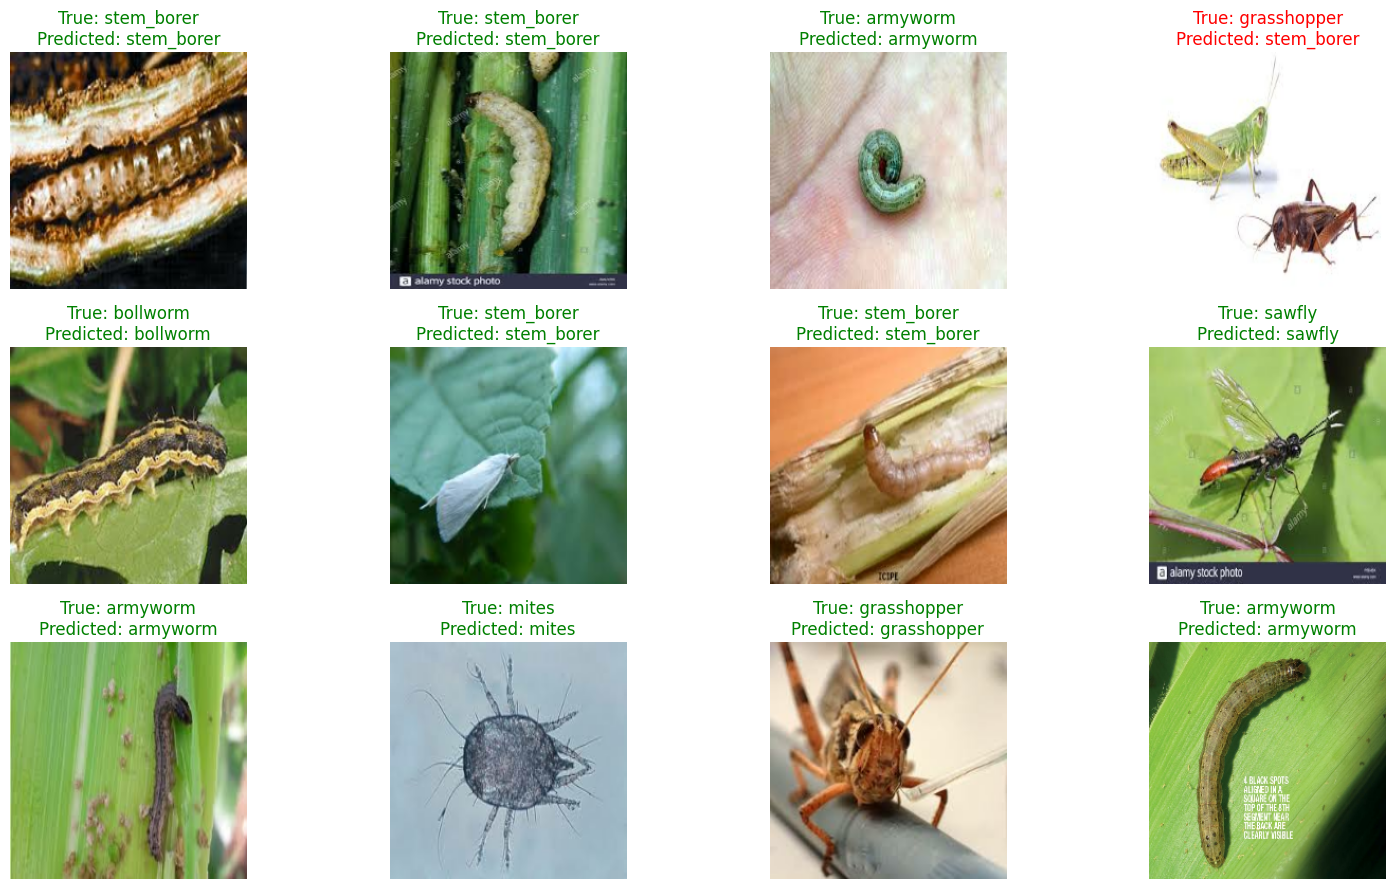

In [67]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Just use directly
true_labels = test_y2  # Already integer-encoded

# Get model predictions
pred_probs = model.predict(test_x2)
pred_labels = np.argmax(pred_probs, axis=1)

# Class names
class_names = ['aphids', 'armyworm', 'beetle', 'bollworm', 'grasshopper', 'mites', 'mosquito', 'sawfly', 'stem_borer']

# Pick random indices
random_indices = random.sample(range(len(test_x2)), 12)

# Plotting
plt.figure(figsize=(16, 9))
for i, idx in enumerate(random_indices):
    img = test_x2[idx]
    true_label = class_names[true_labels[idx]]
    pred_label = class_names[pred_labels[idx]]
    correct = (true_label == pred_label)

    plt.subplot(3, 4, i+1)
    plt.imshow(img)
    color = 'green' if correct else 'red'
    plt.title(f"True: {true_label}\nPredicted: {pred_label}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [46]:
model.save('C:/Users/param/Downloads/EfficentNet_B0/prefect_pest_model_94acc.keras')